# European Social Survey

This data comes from the European Social Survey and was configured based on some variables that I found interesting. Such as "how happy are you", "health", "political left and right scale" and "Important to care for nature and environment". The variables are mostly categorical with at least five values.

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore data

In [3]:
df = pd.read_csv("/Users/dinocuric/Documents/Datasets/ess-de-allrounds.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dinocuric/Documents/Datasets/ess-de-allrounds.csv'

## Data overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25700 entries, 0 to 25699
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cntry     25700 non-null  object 
 1   cname     25700 non-null  object 
 2   cedition  25700 non-null  float64
 3   cproddat  25700 non-null  object 
 4   cseqno    25700 non-null  int64  
 5   name      25700 non-null  object 
 6   essround  25700 non-null  int64  
 7   edition   25700 non-null  float64
 8   idno      25700 non-null  int64  
 9   dweight   25700 non-null  float64
 10  pspwght   25700 non-null  float64
 11  pweight   25700 non-null  float64
 12  anweight  25700 non-null  float64
 13  tvtot     20490 non-null  float64
 14  tvpol     20490 non-null  float64
 15  netusoft  5210 non-null   float64
 16  ppltrst   25700 non-null  int64  
 17  pplfair   25700 non-null  int64  
 18  lrscale   25700 non-null  int64  
 19  stflife   25700 non-null  int64  
 20  stfeco    25700 non-null  in

## Missing values

In [6]:
df.isna().sum()

cntry           0
cname           0
cedition        0
cproddat        0
cseqno          0
name            0
essround        0
edition         0
idno            0
dweight         0
pspwght         0
pweight         0
anweight        0
tvtot        5210
tvpol        5210
netusoft    20490
ppltrst         0
pplfair         0
lrscale         0
stflife         0
stfeco          0
stfgov          0
stfdem          0
stfedu          0
happy           0
health          0
rlgdgr          0
atchctr     20490
atcherp     20490
imprich       106
ipeqopt       106
impenv        106
dtype: int64

## Set figure size

In [7]:
plt.rcParams["figure.figsize"]=12,8

## Explore "left/right"

### Filter, group and aggregate

In [8]:
left_right = df.query('lrscale <= 10').groupby(["essround", "lrscale"]).agg(size= pd.NamedAgg("lrscale", "size"))
left_right

size
essround lrscale      
1        0          73
         1          47
         2         194
         3         418
         4         343
...                ...
9        6         198
         7         125
         8          86
         9          14
         10         25

[99 rows x 1 columns]

In [9]:
left_right.query("essround == 1")

size
essround lrscale      
1        0          73
         1          47
         2         194
         3         418
         4         343
         5        1038
         6         215
         7         205
         8         119
         9          17
         10         38

In [10]:
left_right1 = left_right.query("essround == 1")
left_right1

size
essround lrscale      
1        0          73
         1          47
         2         194
         3         418
         4         343
         5        1038
         6         215
         7         205
         8         119
         9          17
         10         38

### Bar chart

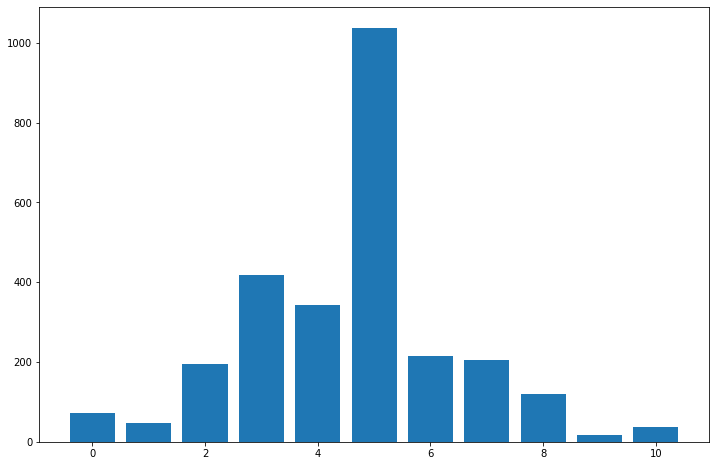

In [11]:
plt.bar(x = range(0,11), height = left_right1["size"])
plt.show()

### Pie chart

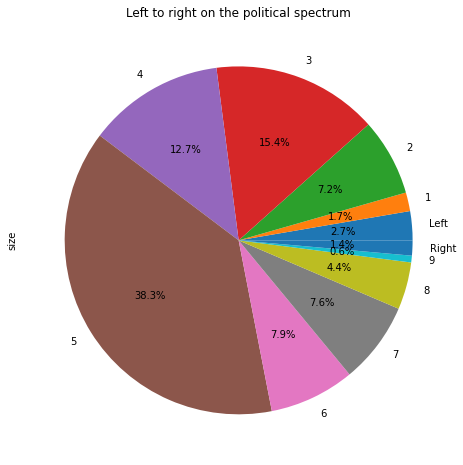

In [30]:
left_right.query("essround == 1")["size"].plot(
    kind="pie", 
    labels = ['Left', '1', '2', "3", "4", "5", "6", "7", "8", "9", "Right"],
    autopct="%1.1f%%", # Adding the percentages

)
plt.title("Left to right on the political spectrum")
plt.show()

In [13]:
left_right = left_right.reset_index()
left_right

,essround,lrscale,size
0,1,0,73
1,1,1,47
2,1,2,194
3,1,3,418
4,1,4,343
...,...,...,...
94,9,6,198
95,9,7,125
96,9,8,86
97,9,9,14


In [14]:
ticks = left_right.query("essround == 1")["lrscale"]
ticks


0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
Name: lrscale, dtype: int64

In [15]:
left_right.query("essround == 1").iloc[:, -1]

0       73
1       47
2      194
3      418
4      343
5     1038
6      215
7      205
8      119
9       17
10      38
Name: size, dtype: int64

In [16]:
left_right["lrscale"].unique()
left_right.query("essround == 1")["size"]

0       73
1       47
2      194
3      418
4      343
5     1038
6      215
7      205
8      119
9       17
10      38
Name: size, dtype: int64

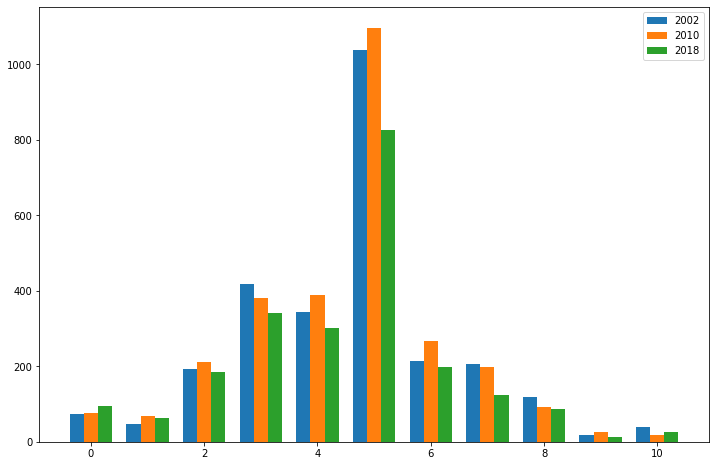

In [32]:
bar_width = 0.25
x_ticks = left_right.query("essround == 1")["size"].index
plt.bar(x_ticks - bar_width,left_right.query("essround == 1")["size"], width=bar_width, label="2002")
plt.bar(x_ticks,left_right.query("essround == 5")["size"], width=bar_width, label="2010")
plt.bar(x_ticks + bar_width,left_right.query("essround == 9")["size"], width=bar_width, label="2018")
plt.legend()
plt.show()

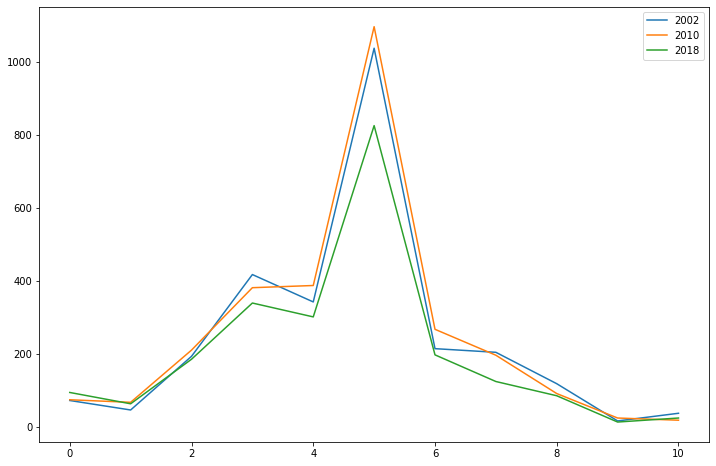

In [31]:
bar_width = 0.25
x_ticks = left_right.query("essround == 1")["size"].index
plt.plot(x_ticks,left_right.query("essround == 1")["size"], label="2002")
plt.plot(x_ticks,left_right.query("essround == 5")["size"], label="2010")
plt.plot(x_ticks, left_right.query("essround == 9")["size"], label="2018")
plt.legend()
plt.show()


### Pivot table

In [19]:
left_right

,essround,lrscale,size
0,1,0,73
1,1,1,47
2,1,2,194
3,1,3,418
4,1,4,343
...,...,...,...
94,9,6,198
95,9,7,125
96,9,8,86
97,9,9,14


In [20]:
left_right.pivot(index="essround", columns=["lrscale"], values="size")

lrscale,0,1,2,3,4,5,6,7,8,9,10
essround,,,,,,,,,,,
1,73,47,194,418,343,1038,215,205,119,17,38
2,72,65,194,367,371,1008,231,155,81,14,32
3,91,60,199,428,382,909,255,140,94,21,21
4,88,48,166,377,385,927,215,180,98,22,30
5,75,68,211,382,388,1097,268,197,92,25,19
6,123,59,212,343,361,1150,242,181,89,12,48
7,109,72,230,433,357,1055,312,191,99,24,40
8,118,58,223,425,369,1023,241,185,88,12,23
9,95,64,186,340,302,826,198,125,86,14,25


### Finally, stacked bar chart

In [21]:
colors = [
"#689f38",
"#7a9a24",
"#8b9509",
"#9c8e00",
"#ad8600",
"#bd7d00",
"#cd7200",
"#dc6509",
"#e95622",
"#f44336"]


In [22]:
pd.date_range(start='2002', end='2018', periods=1).to_numpy()

array(['2002-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

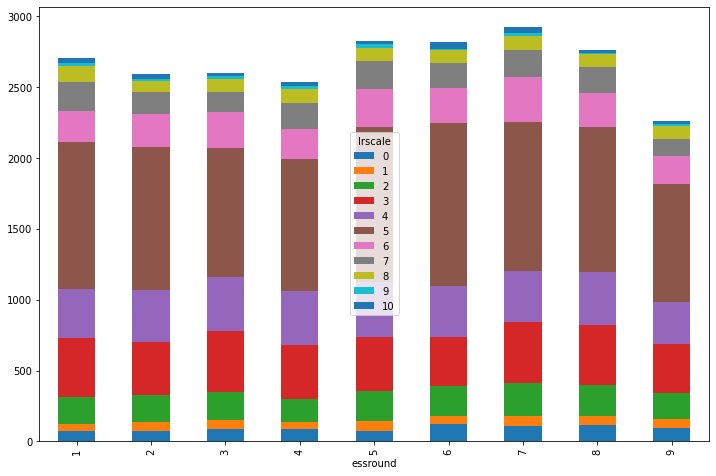

In [33]:
left_right.pivot(index="essround", columns="lrscale", values="size").plot.bar(stacked=True)
plt.show()

## Explore "happiness"

### Filter, group and aggregate

In [24]:
df

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,stfdem,stfedu,happy,health,rlgdgr,atchctr,atcherp,imprich,ipeqopt,impenv
0,DE,ESS1-9e01,1.0,10.12.2020,78061,ESS1e06_6,1,6.6,101114,1.257200,...,8,9,2,1,0,NaN,NaN,2.0,1.0,2.0
1,DE,ESS1-9e01,1.0,10.12.2020,78062,ESS1e06_6,1,6.6,101120,1.257200,...,10,8,8,1,3,NaN,NaN,2.0,1.0,1.0
2,DE,ESS1-9e01,1.0,10.12.2020,78063,ESS1e06_6,1,6.6,101126,1.257200,...,5,7,7,3,4,NaN,NaN,5.0,2.0,1.0
3,DE,ESS1-9e01,1.0,10.12.2020,78064,ESS1e06_6,1,6.6,101304,1.257200,...,10,3,7,3,4,NaN,NaN,3.0,2.0,2.0
4,DE,ESS1-9e01,1.0,10.12.2020,78065,ESS1e06_6,1,6.6,101322,1.257200,...,6,6,6,2,0,NaN,NaN,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25695,DE,ESS1-9e01,1.0,10.12.2020,103756,ESS9e03,9,3.0,69827,0.999466,...,8,3,9,3,5,10.0,7.0,5.0,2.0,1.0
25696,DE,ESS1-9e01,1.0,10.12.2020,103757,ESS9e03,9,3.0,69832,0.999466,...,3,2,7,2,3,5.0,8.0,4.0,2.0,2.0
25697,DE,ESS1-9e01,1.0,10.12.2020,103758,ESS9e03,9,3.0,69859,0.999466,...,7,7,8,2,2,7.0,8.0,1.0,4.0,3.0
25698,DE,ESS1-9e01,1.0,10.12.2020,103759,ESS9e03,9,3.0,69896,0.999466,...,4,3,8,2,0,8.0,6.0,4.0,3.0,2.0


In [25]:
df["happy"].unique()

array([ 2,  8,  7,  6,  9, 10,  5,  4,  3, 77,  1, 88,  0])

In [26]:
happy = df.query("happy <= 10").groupby(["essround","happy"]).size()
happy.unstack()

happy,0,1,2,3,4,5,6,7,8,9,10
essround,,,,,,,,,,,
1,21,16,37,75,116,330,255,525,869,432,237
2,24,12,59,89,110,342,255,517,872,356,222
3,16,13,50,102,111,326,324,581,808,339,236
4,17,19,35,80,74,315,226,529,790,412,242
5,11,8,41,69,103,315,213,557,876,494,326
6,14,20,16,53,54,219,209,529,875,578,388
7,8,11,23,57,74,215,199,537,992,607,317
8,10,12,22,47,58,170,152,442,958,631,347
9,8,4,17,37,46,128,138,386,720,561,310


### Bar chart stacked

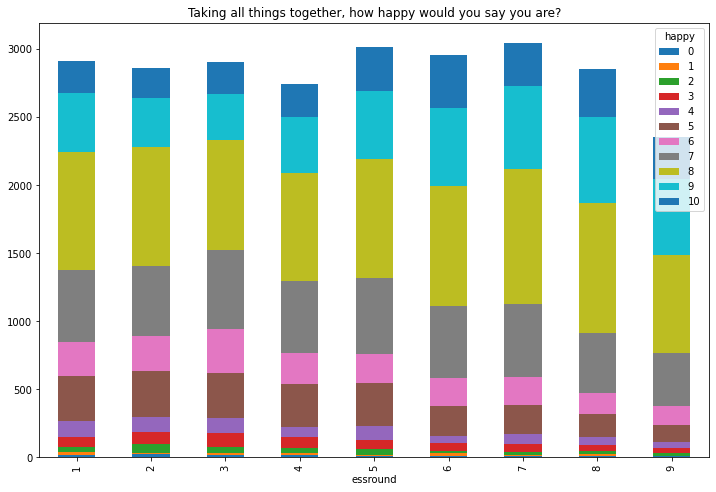

In [34]:
happy.unstack().plot.bar(stacked=True)
plt.title("Taking all things together, how happy would you say you are?")
plt.show()

## Explore "health" by "happiness"

### Filter, group and aggregate

In [28]:
happy_health = df.query("essround == 8 & happy <= 10 & health <= 5").groupby(["happy","health"]).size().unstack()
happy_health

health,1,2,3,4,5
happy,,,,,
0,1.0,3.0,2.0,1.0,3.0
1,1.0,NaN,4.0,4.0,3.0
2,1.0,5.0,6.0,4.0,6.0
3,2.0,14.0,12.0,14.0,5.0
4,4.0,17.0,16.0,18.0,3.0
5,12.0,47.0,81.0,25.0,5.0
6,9.0,45.0,79.0,14.0,5.0
7,39.0,202.0,151.0,43.0,6.0
8,152.0,446.0,296.0,56.0,8.0


### Bar chart stacked

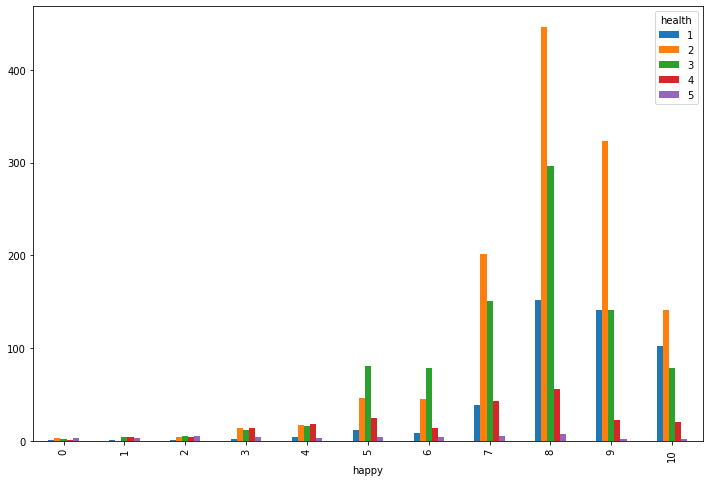

In [35]:
happy_health.plot.bar()
plt.show()